# 1. Инициализация

## 1.1 Библиотеки

In [1]:
import random
import matplotlib.pyplot as plt

## 1.2 Константы

In [2]:
EDGES   = 6     # Количество граней на кубиках
CUBES   = 5     # Количество кубиков
STEPS   = 3     # Количество ходов
WIN     = 1000  # Очки для победы
BARREL  = 900   # Очки для бочки

## 1.3 Начальные значения

In [3]:
scoreSet = {} # Словарь для статистики выпавших очков

# 2. Бросок

In [4]:
def roll(cubes):
    ''' Бросок '''

    # Создание случайного набора кубов
    cubeSet = random.choices(range(1, EDGES + 1), k=cubes)
    
    return cubeSet

# 3. Оценка

## 3.1 Подсчёт одинаковых кубиков

In [5]:
def cubeCount(cubeSet):
    ''' Подсчёт одинаковых кубиков '''

    cubeCount = {}
    
    for item in cubeSet:
    
        if item in cubeCount:
            cubeCount[item] += 1
    
        else:
            cubeCount[item] = 1
    
    return cubeCount

## 3.2 Подсчёт количества очков

In [6]:
def grade(cubeCount):
    ''' Подсчёт количества очков '''

    score = 0
    
    for key, value in cubeCount.items():

        if value == 5:
            score = 1000

        if value == 4:
            score += key*10 + 100

        if value == 3:
            if key == 1:
                score += 100
            else:
                score += key*10

        if value == 2:
            if key == 5:
                score += 5*2
            if key == 1:
                score += 10*2
            
        if value == 1:
            if key == 5:
                score += 5
            if key == 1:
                score += 10

    return score 

## 3.3 Определение небитки

In [7]:
def checkStrike(cubeCount):
    ''' Определение небитки '''

    check = False

    # Копирование сета, чтобы при удалении ключа он не мешал итерации
    keys_to_remove = cubeCount.copy()

    for key, value in cubeCount.items():
        
        if value == 5:
            del keys_to_remove[key]

        if value == 4:
            del keys_to_remove[key]

        if value == 3:
            del keys_to_remove[key]

        if value == 2:
            del keys_to_remove[key]
        
        if value == 1:
            if key == 1:
                del keys_to_remove[key]
            if key == 5:
                del keys_to_remove[key]

    if not keys_to_remove:
        check = True

    return check


In [8]:
def scoreCount(score, scoreSet):
    ''' Подсчёт одинаковых очков '''
    
    if score in scoreSet:
        scoreSet[score] += 1
    else:
        scoreSet[score] = 1
    
    return scoreSet  # Return the dictionary with counts

## 3.4 Определение булки

In [9]:
def checkFoul(score):
    ''' Определение булки '''

    if score == 0:
        return True
    else:
        return False 

# 4. Гейм

In [10]:
class Player:

    def __init__(self, name, strategy=None):
        ''' Конструктор игрока '''
        
        self.name       = name
        self.strategy   = strategy
        
        self.score      = 0

In [11]:
# Создаем экземпляры класса Player с передачей имени и стратегии
playerA = Player("Жадный")
playerB = Player("Прозорливый")

# Добавляем их в массив
playerSet = [playerA, playerB]

In [12]:
def maxScore(playerSet):
    ''' Определение максимального счёта у игроков '''

    # Начальное значение максимального счёта
    max_score = 0

    # Пройдемся по каждому игроку в playerSet
    for player in playerSet:

        # Проверим, является ли текущий счёт игрока новым максимумом
        if player.score > max_score:
            max_score = player.score

    return max_score

In [13]:
def raffle(cubes):
    ''' Розыгрыш '''

    # Бросок кубкиков
    cubeSet = roll(cubes)
    print('Расклад: ', cubeSet)

    # Подсчёт одинаковых кубиков
    cubeSetCount = cubeCount(cubeSet)
    print('Подсчёт: ', cubeSetCount)

    # Подсчёт суммы очков
    score = grade(cubeSetCount)
    print('Очки: ', score)

    return score, cubeSetCount

In [14]:
def game(playerSet):
    ''' Розыгрыш партии '''

    # Начальный счёт игры
    record = 0

    # Начальный ход
    i = 0

    print('Новая игра')

    # Цикл до победных очков
    while record < WIN:

        i += 1

        # Цикл по очерёдности игроков
        for player in playerSet:
            
            score = 0
            step  = 0

            print(f'Ход №{i} игрока {player.name}')

            # Цикл по количеству бросков
            while step < STEPS:
                step += 1

                # Розыгрыш
                score, cubeSetCount = raffle(CUBES)
                print('Очки: ', score)

                # Определение небитки
                if checkStrike(cubeSetCount):
                    step = 0
                    print('Небитка')

                # Определение булки
                if checkFoul(score):
                    step = STEPS
                    print('Булка')

                # Суммирование очков игрока
                player.score += score
                print('Всего: ', player.score)

        # Определение максимального счёта
        record = maxScore(playerSet)

In [15]:
game(playerSet)

Новая игра
Ход №1 игрока Жадный
Расклад:  [6, 2, 4, 3, 5]
Подсчёт:  {6: 1, 2: 1, 4: 1, 3: 1, 5: 1}
Очки:  5
Очки:  5
Всего:  5
Расклад:  [1, 6, 1, 6, 4]
Подсчёт:  {1: 2, 6: 2, 4: 1}
Очки:  20
Очки:  20
Всего:  25
Расклад:  [3, 5, 4, 6, 5]
Подсчёт:  {3: 1, 5: 2, 4: 1, 6: 1}
Очки:  10
Очки:  10
Всего:  35
Ход №1 игрока Прозорливый
Расклад:  [5, 2, 5, 3, 2]
Подсчёт:  {5: 2, 2: 2, 3: 1}
Очки:  10
Очки:  10
Всего:  10
Расклад:  [3, 2, 1, 5, 6]
Подсчёт:  {3: 1, 2: 1, 1: 1, 5: 1, 6: 1}
Очки:  15
Очки:  15
Всего:  25
Расклад:  [5, 3, 2, 5, 6]
Подсчёт:  {5: 2, 3: 1, 2: 1, 6: 1}
Очки:  10
Очки:  10
Всего:  35
Ход №2 игрока Жадный
Расклад:  [4, 4, 2, 1, 2]
Подсчёт:  {4: 2, 2: 2, 1: 1}
Очки:  10
Очки:  10
Небитка
Всего:  45
Расклад:  [6, 5, 1, 2, 5]
Подсчёт:  {6: 1, 5: 2, 1: 1, 2: 1}
Очки:  20
Очки:  20
Всего:  65
Расклад:  [2, 5, 3, 5, 5]
Подсчёт:  {2: 1, 5: 3, 3: 1}
Очки:  50
Очки:  50
Всего:  115
Ход №2 игрока Прозорливый
Расклад:  [6, 1, 4, 1, 5]
Подсчёт:  {6: 1, 1: 2, 4: 1, 5: 1}
Очки:  25
Оч

In [16]:
# scoreSet = scoreCount(score, scoreSet)

# 5. Стратегии

## 5.1 Неазартная стратегия

In [17]:
# Ход     Отложить    Записать
# 1       25          50
# 2       25          50    
# 3       25          50


# 6. Статистика

## 6.1 Вероятность распределения очков

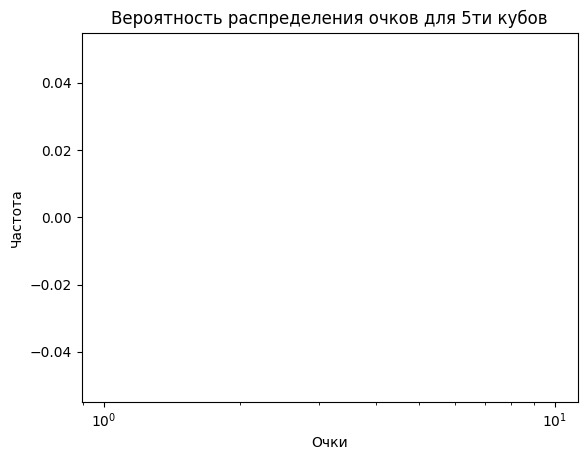

In [18]:
# Нормализация частоты
total_frequency = sum(scoreSet.values())
normalized_data = {key: value / total_frequency for key, value in scoreSet.items()}

# Оформление графика
plt.bar(normalized_data.keys(), normalized_data.values(), width=3)  # изменяем ширину столбцов
plt.xlabel('Очки')
plt.ylabel('Частота')
plt.title('Вероятность распределения очков для 5ти кубов')

# Переходим к логарифмической шкале по оси x
plt.xscale('log')  

# Строим график
plt.show()